In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
from proj1_helpers import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [4]:
! pwd

/home/mohamed/ML_course/projects/project1/ml-project-1-bkm


## Load the training data into feature matrix, class labels, and event ids:

In [5]:
DATA_TRAIN_PATH='./data/train.csv' 


Y1, X1, ids= load_csv_data(DATA_TRAIN_PATH)

Y1=Y1.reshape((Y1.shape[0],1))

###Train-Dev-test data split

In [6]:
def train_dev_test_split(X,Y,ids,train,dev,test):
  a=np.random.rand(X.shape[0])
  return  X[a<train], X[((a>=train) & (a<train+dev))], X[a>=train+dev], Y[a<train], Y[((a>=train) & (a<train+dev))], Y[a>=train+dev], ids[a<train], ids[((a>=train) & (a<train+dev))], ids[a>=train+dev]

X_train, X_dev, X_test, Y_train, Y_dev, Y_test, ids_train, ids_dev, ids_test = train_dev_test_split(X1,Y1,ids,0.6,0.2,0.2)


In [7]:
Y_train.shape

(149901, 1)

In [8]:
Y1.shape

(250000, 1)

###Compute cost

In [9]:
np.abs(np.corrcoef(X1.T))

array([[1.00000000e+00, 4.55754982e-01, 1.68547985e-01, 1.98764690e-01,
        1.62660860e-01, 1.60523916e-01, 1.62521066e-01, 2.28104685e-01,
        4.58258755e-02, 2.01464410e-01, 1.70725931e-02, 3.58962714e-01,
        1.62623001e-01, 1.31495478e-01, 2.57909175e-03, 6.17683359e-03,
        9.94446173e-02, 1.00600077e-02, 7.44499050e-04, 2.33723570e-01,
        7.41075286e-03, 2.21984489e-01, 2.21077743e-01, 2.50158444e-01,
        2.47083378e-01, 2.47078209e-01, 1.62835955e-01, 1.62613682e-01,
        1.62609042e-01, 1.85371791e-01],
       [4.55754982e-01, 1.00000000e+00, 1.90109488e-01, 2.49115929e-01,
        1.76386051e-01, 1.90392025e-01, 1.75941781e-01, 4.32514093e-02,
        1.77575270e-02, 1.46836679e-01, 3.49503614e-01, 4.19757335e-01,
        1.76262284e-01, 1.45464145e-01, 2.10917148e-03, 1.13208392e-03,
        3.10647518e-01, 6.77706784e-03, 3.40330242e-04, 1.83716377e-01,
        1.59253407e-02, 1.67810640e-01, 2.10537065e-01, 2.29674008e-01,
        2.20369870e-01,

In [10]:
test=(np.abs(np.corrcoef(X1.T))>0.9)&(np.abs(np.corrcoef(X1.T))<1)
np.where(test)


(array([ 0,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
         6,  6,  6,  9,  9, 12, 12, 12, 12, 12, 12, 17, 18, 19, 21, 21, 23,
        23, 24, 24, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27,
        28, 28, 28, 28, 28, 28, 29]),
 array([ 0,  5,  6, 12, 26, 27, 28,  4,  5,  6, 12, 26, 27, 28,  4,  5, 12,
        26, 27, 28, 21, 29,  4,  5,  6, 26, 27, 28, 17, 18, 19,  9, 21, 24,
        25, 23, 25, 23, 24,  4,  5,  6, 12, 27, 28,  4,  5,  6, 12, 26, 28,
         4,  5,  6, 12, 26, 27,  9]))

In [11]:
def compute_cost_for_lin_reg(X,Y,w):
  n=Y.shape[0]
  e=Y-np.dot(X,w)
  return (np.dot(e.T,e)/(2*n))[0][0]


###Sigmoid function

In [12]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    #(≈ 1 line of code)
    # s = ...
    # YOUR CODE STARTS HERE
    s=1/(1+np.exp(-z))
    
    # YOUR CODE ENDS HERE
    
    return s

###Prediction

In [13]:
def predict_logistic_reg(w,X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size(n,p)
    b -- bias, a scalar
    X -- data of size (p,1)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    
    Y_prediction = np.zeros((X.shape[0],1))
    w = w.reshape(X.shape[1], 1)
    
    A=sigmoid(np.dot(X,w))
    Y_prediction=(A>=0.5).astype(int)*2 - 1
    
    return Y_prediction

# **Linear regression using normal equation**

In [14]:
def least_square(X,Y):
  w=np.linalg.inv((X.T @ X)) @( (X.T @ Y))
  cost=compute_cost_for_lin_reg(X,Y,w)
  return w,cost



In [13]:
w,cost=least_square(X_train,Y_train)

In [14]:
print(cost)

0.34054992590516076


#Compute gradient

In [15]:
def grad_for_lin_reg(X,Y,w):
   n=Y.shape[0]
  # print(X.shape)
  # print(Y.shape)
  # print(w.shape)
  # print(n)
   e=Y - X @ w
   
   #print(e.shape)
   
   return (-1/n)*np.dot(X.T,e)



# Linear regression using gradient descent





In [16]:
def least_squares_GD(Y, X, initial_w, max_iter, gamma):
  ws=[]
  costs=[]
  ws.append(initial_w)
  w=initial_w
  for iter in range(max_iter):
    cost=compute_cost_for_lin_reg(X,Y,w)
    grad_w=grad_for_lin_reg(X,Y,w)
    w=w-gamma*grad_w
    ws.append(w)
    costs.append(cost)

  return w, costs

In [17]:

initial_w=np.zeros((X_train.shape[1],1))
ws_lin_reg, costs_lin_reg=least_squares_GD(Y_train, X_train, initial_w, 100, 0.00000001)


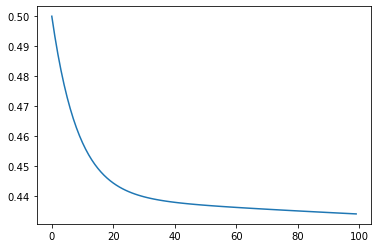

In [18]:
plt.plot(costs_lin_reg)
plt.show()

# Linear regression using gradient descent


In [15]:
def batch_iter(y, tx, batch_size, num_batches=1, shuffle=True):
    """
    Generate a minibatch iterator for a dataset.
    Takes as input two iterables (here the output desired values 'y' and the input data 'tx')
    Outputs an iterator which gives mini-batches of `batch_size` matching elements from `y` and `tx`.
    Data can be randomly shuffled to avoid ordering in the original data messing with the randomness of the minibatches.
    Example of use :
    for minibatch_y, minibatch_tx in batch_iter(y, tx, 32):
        <DO-SOMETHING>
    """
    data_size = len(y)

    if shuffle:
        shuffle_indices = np.random.permutation(np.arange(data_size))
        shuffled_y = y[shuffle_indices]
        shuffled_tx = tx[shuffle_indices]
    else:
        shuffled_y = y
        shuffled_tx = tx
    for batch_num in range(num_batches):
        start_index = batch_num * batch_size
        end_index = min((batch_num + 1) * batch_size, data_size)
        if start_index != end_index:
            yield shuffled_y[start_index:end_index], shuffled_tx[start_index:end_index]


In [16]:
def least_squares_SGD(Y, X, initial_w, max_iter, gamma):
  ws=[]
  costs=[]
  ws.append(initial_w)
  w=initial_w
  for iter in range(max_iter):
    cost=compute_cost_for_lin_reg(X,Y,w)
    for sub_Y, sub_X in batch_iter(Y, X, 1):
        grad_w=grad_for_lin_reg(sub_X,sub_Y,w)
        w=w-gamma*grad_w
        ws.append(w)
        costs.append(cost)

  return ws, costs

In [17]:
initial_w=np.zeros((X_train.shape[1],1))
ws_lin_reg_sgd, costs_lin_reg_sgd=least_squares_SGD(Y_train, X_train, initial_w, 100, 0.000000001)
plt.plot(costs_lin_reg_sgd)
plt.show()

NameError: name 'grad_for_lin_reg' is not defined

In [18]:
def ridge_regression(X ,Y ,lambda_ ):
  w=np.linalg.inv((X.T @ X)+lambda_*np.eye(X.shape[1])) @( (X.T @ Y))
  cost=compute_cost_for_lin_reg(X,Y,w)
  return w,cost

In [19]:
w_ridge_reg, cost_ridge_reg=ridge_regression(X_train, Y_train, 10)

In [20]:
print(cost_ridge_reg)

0.3392299944384453


#Logistic regression

In [21]:
def compute_cost_for_log_reg(X,Y,w):
  n=X.shape[0]
  y_chap=sigmoid(np.dot(X, w))

  return np.sum(Y*np.log(y_chap) - (1-Y)*np.log(1-y_chap))/n

In [22]:
def grad_for_log_reg(X,Y,w):
  n=X.shape[0]
  e=sigmoid(np.dot(X, w))-Y
   
   #print(e.shape)
   
  return (1/n)*np.dot(X.T,e)

In [23]:
def logistic_regression(Y, X, initial_w, max_iter, gamma):
  ws=[]
  costs=[]
  ws.append(initial_w)
  w=initial_w
  for iter in range(max_iter):
    cost=compute_cost_for_log_reg(X,Y,w)
    grad_w=grad_for_log_reg(X,Y,w)
    w=w-gamma*grad_w
    ws.append(w)
    costs.append(cost)

  return ws, costs

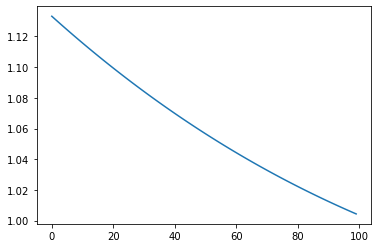

[[ 1.27299578e-05]
 [-4.97354293e-06]
 [-6.34438260e-06]
 [-3.42885802e-06]
 [ 5.98134840e-05]
 [ 5.69153939e-05]
 [ 5.98235160e-05]
 [-1.82350732e-07]
 [-1.51438272e-06]
 [-1.08302949e-05]
 [-1.27196842e-07]
 [ 3.94372724e-08]
 [ 5.98348261e-05]
 [-2.51468650e-06]
 [ 7.25826031e-10]
 [ 2.95440216e-10]
 [-3.69679168e-06]
 [ 1.64851613e-09]
 [-2.86744195e-09]
 [-3.19544326e-06]
 [ 1.61282789e-09]
 [-1.48726917e-05]
 [-6.60202935e-08]
 [ 3.39840734e-05]
 [ 3.70634346e-05]
 [ 3.70639293e-05]
 [ 5.88038286e-05]
 [ 5.98394951e-05]
 [ 5.98390428e-05]
 [-4.61881677e-06]]


In [24]:
initial_w=np.zeros((X_train.shape[1],1))
ws_log_reg, costs_log_reg=logistic_regression(Y_train, X_train, initial_w, 100, 0.000000001)
plt.plot(costs_log_reg)
plt.show()
print(ws_log_reg[-1])

In [37]:
def compute_cost_for_log_reg_regularized(X,Y,w,lambda_):
   n=X.shape[0]
   y_chap=sigmoid(np.dot(X, w))

   return ((np.sum(Y*np.log(y_chap) - (1-Y)*np.log(1-y_chap))+(lambda_/2)*np.dot(w.T,w))/n)[0][0]

In [38]:
def grad_for_log_reg_regularized(X,Y,w,lambda_):
  n=X.shape[0]
  e=sigmoid(np.dot(X, w))-Y
   
   #print(e.shape)
   
  return (1/n)*(np.dot(X.T,e) +lambda_*w)

In [39]:
def reg_logistic_regression(Y, X, initial_w, max_iter, gamma,lambda_):
  ws=[]
  costs=[]
  ws.append(initial_w)
  w=initial_w
  for iter in range(max_iter):
    cost=compute_cost_for_log_reg_regularized(X,Y,w,lambda_)
    grad_w=grad_for_log_reg_regularized(X,Y,w,lambda_)
    w=w-gamma*grad_w
    ws.append(w)
    costs.append(cost)

  return ws, costs

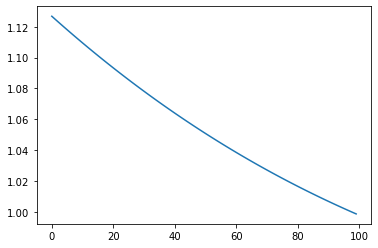

In [40]:
initial_w=np.zeros((X_train.shape[1],1))
ws_log_reg_regularised, costs_log_reg_regularised=reg_logistic_regression(Y_train, X_train, initial_w, 100, 0.000000001,10)
plt.plot(costs_log_reg_regularised)
plt.show()


In [41]:
print(ws_log_reg_regularised[-1])

[[ 1.26728255e-05]
 [-4.94939389e-06]
 [-6.32117384e-06]
 [-3.39907120e-06]
 [ 5.92958044e-05]
 [ 5.63119095e-05]
 [ 5.93072730e-05]
 [-1.81684505e-07]
 [-1.50477630e-06]
 [-1.07701522e-05]
 [-1.26580646e-07]
 [ 3.92117071e-08]
 [ 5.93176864e-05]
 [-2.49386204e-06]
 [ 9.36802716e-10]
 [-2.48790950e-10]
 [-3.67666850e-06]
 [ 2.09156625e-09]
 [-3.17549762e-09]
 [-3.17266153e-06]
 [ 1.71106349e-09]
 [-1.47926921e-05]
 [-6.59710104e-08]
 [ 3.38140816e-05]
 [ 3.68627537e-05]
 [ 3.68629222e-05]
 [ 5.82835802e-05]
 [ 5.93226192e-05]
 [ 5.93223432e-05]
 [-4.59962153e-06]]


In [42]:
pred=predict_logistic_reg(ws_log_reg_regularised[-1],X_train)
print(np.sum(np.abs(pred-Y_train))/Y_train.shape[0])

0.7229531094113735


In [52]:
DATA_TEST_PATH='../ML_course/projects/project1/data/test.csv' 


Y_test, X_test, ids_test= load_csv_data(DATA_TEST_PATH)


In [55]:
Y_test.shape

(568238, 1)

In [56]:
ids_test.shape

(568238,)

In [58]:
Y_test=predict_logistic_reg(ws_log_reg_regularised[-1],X_test)

In [59]:
Y_test.shape

(568238, 1)

In [63]:
ids_test=ids_test.reshape((ids_test.shape[0],1))

In [64]:
ids_test.shape

(568238, 1)

In [65]:
create_csv_submission(ids_test, Y_test, 'bkm')